# MACHINE LEARNING PROJECT ON DELHI HOUSE PRICE PREDICTION

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.linear_model import LinearRegression
import seaborn as sns
matplotlib.rcParams['figure.figsize']=(20,10)
df=pd.read_csv('MagicBricks.csv')
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [131]:
type(df)

pandas.core.frame.DataFrame

In [132]:
df.shape

(1259, 11)

In [133]:
df2=df.copy()


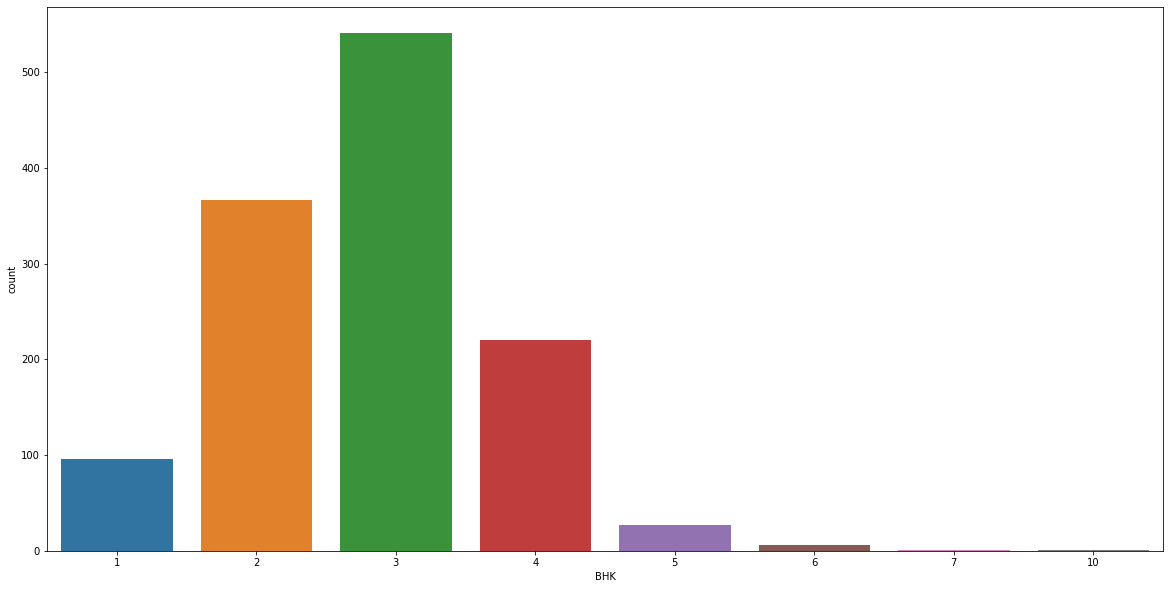

In [135]:
sns.countplot(df.BHK)

In [136]:
df['BHK'].value_counts()

3     541
2     367
4     220
1      96
5      27
6       6
10      1
7       1
Name: BHK, dtype: int64

 Dropping data for BHK having low value count

In [137]:

df[df['BHK']==7 ] 


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
345,2970.0,7,4.0,Furnished,"Yamuna Vihar, Shahdara",1.0,26500000,Ready_to_move,Resale,Builder_Floor,8923.0


In [138]:
df[df['BHK']==6 ]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
163,4050.0,6,3.0,Furnished,Budh Vihar Phase 1,1.0,5100000,Ready_to_move,Resale,Builder_Floor,1259.0
164,2400.0,6,4.0,Furnished,Budh Vihar Phase 2,1.0,6000000,Ready_to_move,Resale,Builder_Floor,2500.0
261,2800.0,6,4.0,Semi-Furnished,"Taimoor Enclave, New Friends Colony carpet are...",2.0,29500000,Ready_to_move,Resale,Apartment,15459.0
352,324.0,6,3.0,Furnished,"Yamuna Vihar, Shahdara",1.0,8700000,Ready_to_move,Resale,Builder_Floor,35714.0
353,720.0,6,5.0,Furnished,"Yamuna Vihar, Shahdara",1.0,22000000,Ready_to_move,Resale,Builder_Floor,35714.0
585,5500.0,6,7.0,Furnished,Safdarjung Enclave,1.0,160000000,Ready_to_move,Resale,Apartment,14818.0


In [139]:
df[df['BHK']==10] 

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
721,1200.0,10,4.0,Semi-Furnished,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,17000000,Ready_to_move,Resale,Apartment,NaN


In [140]:
df.drop([163,164,261,352,353,585,345,721],inplace=True)


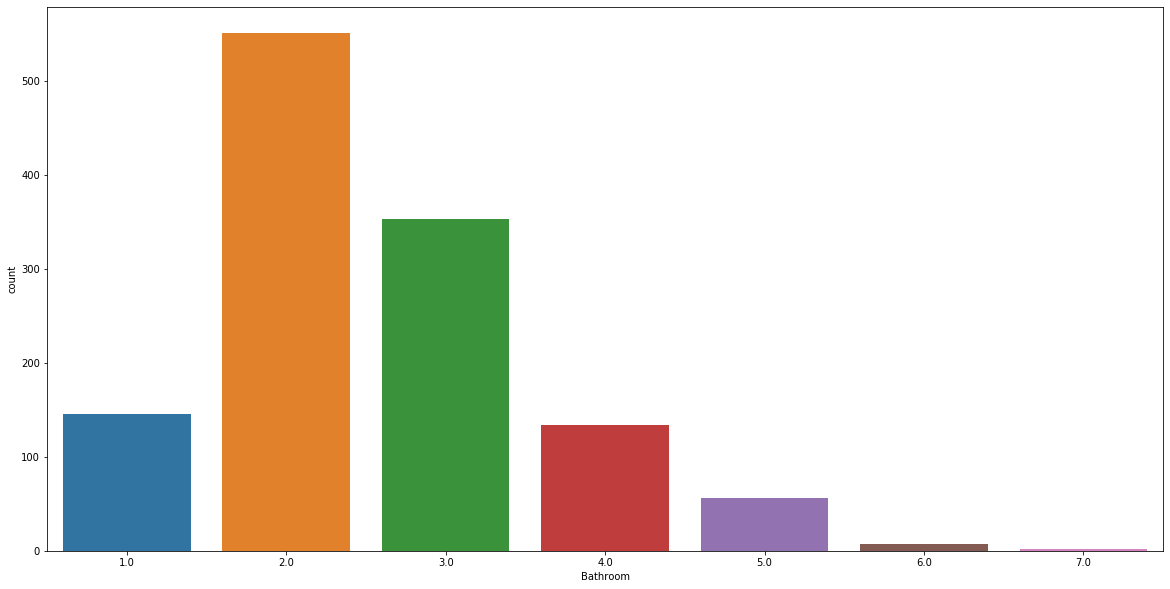

In [141]:
sns.countplot(df['Bathroom'])

Dropping data for Bathroom having low value count

In [142]:
df[df['Bathroom']==6 ]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
225,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
495,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
527,810.0,5,6.0,Furnished,Geeta Colony,1.0,28900000,Ready_to_move,Resale,Apartment,6667.0
659,3050.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,NaN,62500000,Ready_to_move,Resale,Apartment,20492.0
676,3112.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,3.0,60000000,Ready_to_move,Resale,Apartment,19280.0
681,2300.0,5,6.0,Semi-Furnished,"Common Wealth Games Village, Commonwealth Game...",3.0,58000000,Ready_to_move,Resale,Apartment,21311.0
1211,4350.0,4,6.0,Semi-Furnished,"Orchid Metropolis, Hauz Khas",2.0,135000000,Ready_to_move,New_Property,Apartment,170000.0


In [143]:
df[df['Bathroom']==7]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
248,10350.0,4,7.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",3.0,160000000,Ready_to_move,New_Property,Apartment,15459.0
1029,5236.0,5,7.0,Unfurnished,"The Amaryllis, Karol Bagh",3.0,73700000,Almost_ready,New_Property,Apartment,14092.0


In [144]:
df.drop([248,1029,1211,681,676,659,527,495,225],inplace=True)

In [145]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


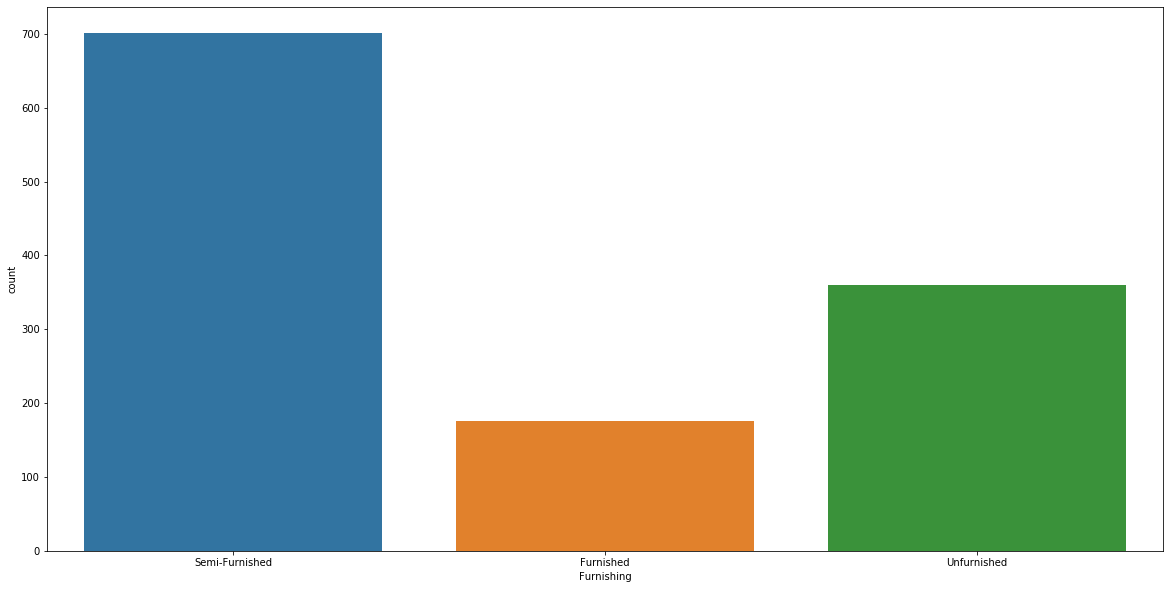

In [146]:
sns.countplot(df['Furnishing'])

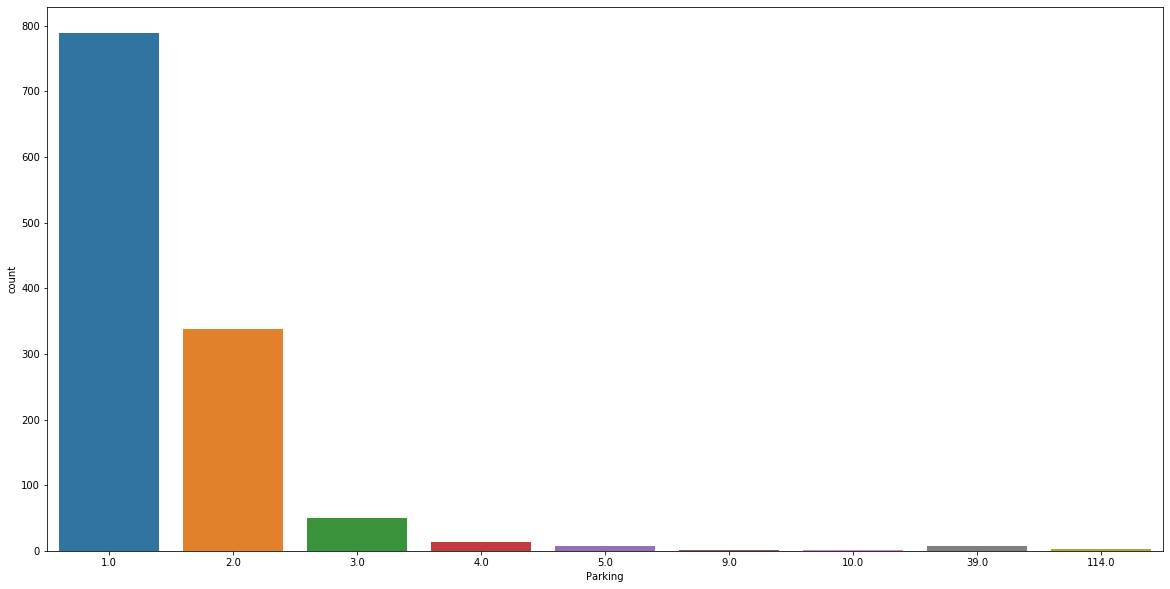

In [147]:
sns.countplot(df['Parking'])

Filling null values of Parking

In [148]:
import math
parking=math.floor(df.Parking.median())
df.Parking=df.Parking.fillna(parking)
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [149]:
df.Parking.value_counts()

1.0      821
2.0      338
3.0       50
4.0       14
39.0       7
5.0        7
114.0      3
10.0       1
9.0        1
Name: Parking, dtype: int64

Dropping values of Parking for which value count is very low

In [150]:
df[df['Parking']==114]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
969,900.0,2,2.0,Unfurnished,"Mangal Apartment, Vasundhara Enclave",114.0,9000000,Ready_to_move,Resale,Apartment,NaN
970,1100.0,2,2.0,Semi-Furnished,Vasundhara Enclave,114.0,10000000,Ready_to_move,Resale,Apartment,NaN
971,950.0,2,2.0,Unfurnished,Vasundhara Enclave,114.0,8100000,Ready_to_move,Resale,Apartment,NaN


In [151]:
df[df['Parking']==10]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
941,1076.39,3,2.0,Unfurnished,"Dilshad Colony, Dilshad Garden",10.0,9300000,Ready_to_move,Resale,Builder_Floor,8640.0


In [152]:
df[df['Parking']==9]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
242,6000.0,5,5.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",9.0,220000000,Ready_to_move,New_Property,Builder_Floor,120000.0


In [153]:
df.drop([242,941,969,970,971],inplace=True)


In [154]:
df.Parking.value_counts()

1.0     821
2.0     338
3.0      50
4.0      14
39.0      7
5.0       7
Name: Parking, dtype: int64

Filling null values of Bathroom

In [156]:
median_bathroom=math.floor(df.Bathroom.median())
df.Bathroom=df.Bathroom.fillna(median_bathroom)
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [157]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       5
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       237
dtype: int64

Filling null values of Per_Sqft

In [158]:
perSqft=df.Price/df.Area
df.Per_Sqft=df.Per_Sqft.fillna(perSqft)
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


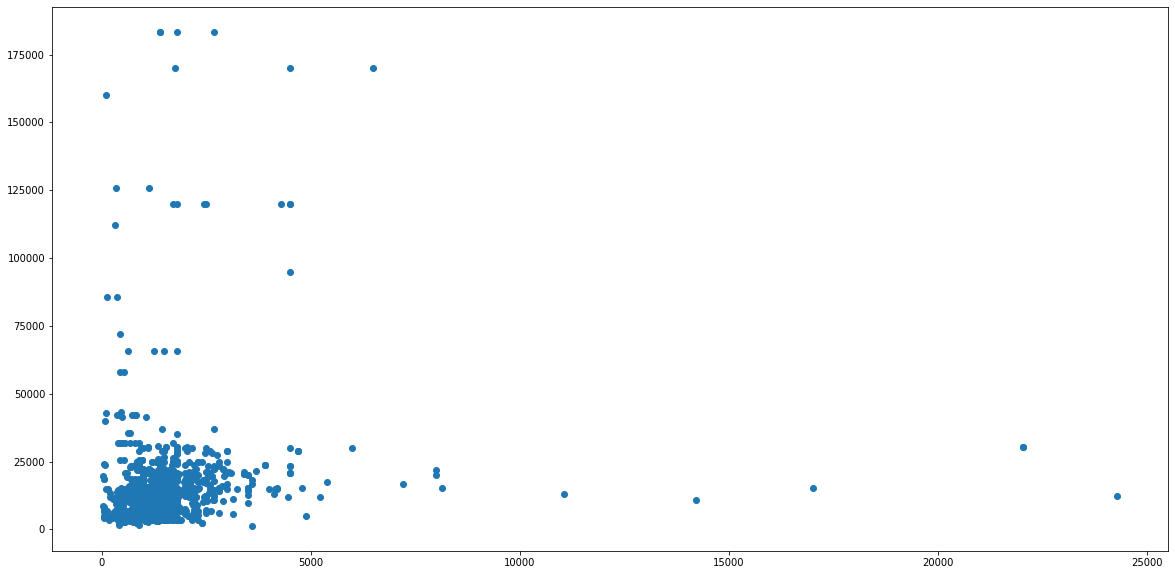

In [159]:
plt.scatter(df.Area,df.Per_Sqft)


In [160]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

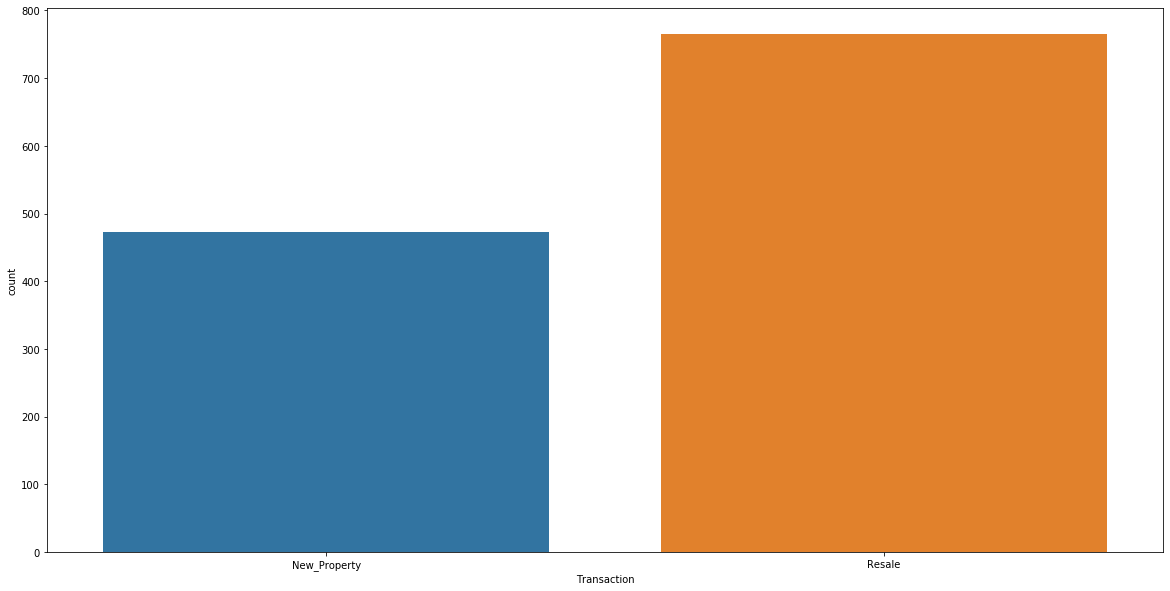

In [161]:
sns.countplot(df['Transaction'])

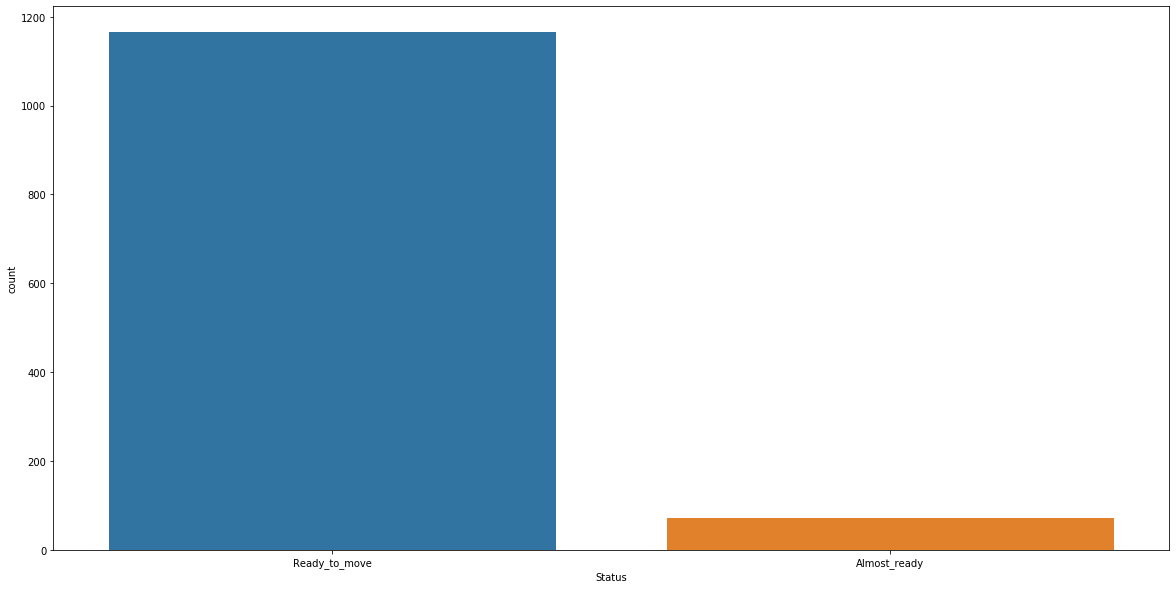

In [162]:
sns.countplot(df['Status'])

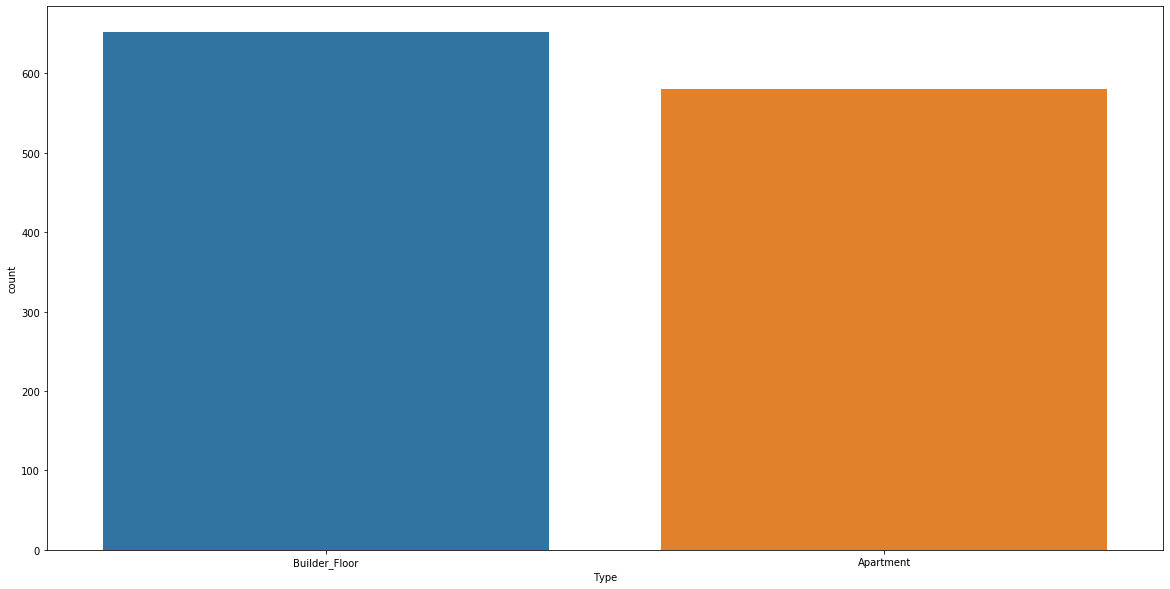

In [163]:
sns.countplot(df['Type'])

Dropping Null values

In [164]:
df=df.dropna()
df.Furnishing.unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

# OneHotEncoding

In [165]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df.Furnishing=le.fit_transform(df.Furnishing)
#df.Transaction=le.fit_transform(df.Transaction)
#df.Status=le.fit_transform(df.Status)
df

G:\COVID-19\Anaconda_2020\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2.0,1,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,1,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,1,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,1,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,1,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,2,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


# Training and Testing the dataset

In [166]:
df1=df.copy()

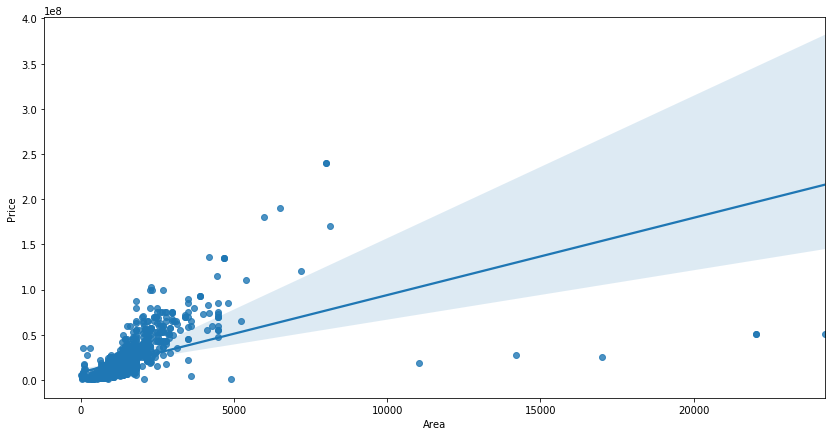

In [104]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.regplot(x="Area", y="Price", data=df1)

In [105]:

X=df.drop(['Locality','Per_Sqft','Price','Type','Status','Transaction'],axis='columns')   #To Avoid too much collinearity

y=df.Price

In [106]:
X

,Area,BHK,Bathroom,Furnishing,Parking
0,800.0,3,2.0,1,1.0
1,750.0,2,2.0,1,1.0
2,950.0,2,2.0,0,1.0
3,600.0,2,2.0,1,1.0
4,650.0,2,2.0,1,1.0
...,...,...,...,...,...
1254,4118.0,4,5.0,2,3.0
1255,1050.0,3,2.0,1,3.0
1256,875.0,3,3.0,1,3.0
1257,990.0,2,2.0,2,1.0


# Training and Testing

In [107]:
 from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# LinearRegression

In [108]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.5080885373356852

# DecisionTreeRegressor

In [109]:
from sklearn.tree import DecisionTreeRegressor 
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
print(model2.score(X_test,y_test))

0.7978501475174724


# MeanSquareError

In [110]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [111]:
pred1 = model1.predict(X_test)
print(sqrt(mse(y_test,pred1)))

17968588.086182956


In [112]:
pred2 = model2.predict(X_test)
print(sqrt(mse(y_test,pred2)))

11518798.893222377


In [113]:
model1.predict([[800,3,2.0,1,1.0]])

array([11290170.5511384])

In [114]:
model2.predict([[800,3,2.0,1,1.0]])

array([6305000.])

model2 is more accurate than model1

To get a better result, dropping the data having area more than 5000

In [115]:
p = np.array(df[df.Area>5000].index)
df.drop(p,inplace=True)

G:\COVID-19\Anaconda_2020\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


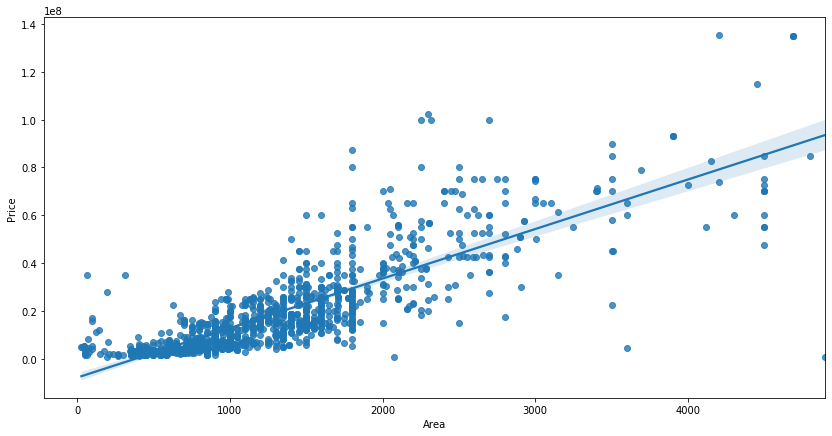

In [116]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.regplot(x="Area", y="Price", data=df)

In [117]:
X1=df.drop(['Locality','Per_Sqft','Price','Type','Status','Transaction'],axis='columns')   #To Avoid too much collinearity

y1=df.Price

# Training and Testing the model

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=42)


# LinearRegression

In [119]:

from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.7152057497074491

# DecisionTreeRegressor

In [120]:
from sklearn.tree import DecisionTreeRegressor 
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
print(model2.score(X_test,y_test))


0.6152650336531904


# MeanSquaredError

Lesser the mse means more accurate the prediction

In [121]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt


In [122]:
pred1 = model1.predict(X_test)
print(sqrt(mse(y_test,pred1)))

10277130.441508386


In [123]:
pred2 = model2.predict(X_test)
print(sqrt(mse(y_test,pred2)))

11945025.730043476


In [124]:
model1.predict([[800,3,2.0,1,1.0]])

array([8162383.7614825])

In [125]:
model2.predict([[800,3,2.0,1,1.0]])

array([5542857.14285714])

model2 is more accurate than model1

# Export the tested model to a pickle file

In [126]:
'''import pickle
with open('MagicBricks.csv','wb') as d:
    pickle.dump(model1,d)'''
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model1,f)

# Export location and column information to a file that will be useful later in  our prediction application

In [127]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as d:
    d.write(json.dumps(columns))